In [5]:
import pandas as pd

df_wine = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch04/wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
#Wineデータの標準化

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y =df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# pd.DataFrame(X_train_std)

In [40]:
#クラス内分散の算出（その1）
import numpy as np

np.set_printoptions(precision=3)
mean_vecs=[]
for label in range(1,len(np.unique(y))+1):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))

d = len(X[0,:]) #13
S_W = np.zeros((d, d))

for label, mv in zip(range(1,len(np.unique(y))+1), mean_vecs): #classごと
    
    class_scatter = np.zeros((d, d))
    
    for row in X_train_std[y_train==label]: #classごとのデータを回す
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter +=(row - mv).dot((row - mv).T)
        
    #print(pd.DataFrame(class_scatter))
    S_W += class_scatter
    

#pd.DataFrame(S_W[5])

In [44]:
#クラス内分散S_Wの算出（その2）
import numpy as np

np.set_printoptions(precision=3)
mean_vecs=[]
for label in range(1,len(np.unique(y))+1):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))

d = len(X[0,:]) #13
S_W = np.zeros((d, d))

for label, mv in zip(range(1,len(np.unique(y))+1), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
    
pd.DataFrame(S_W)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.285679,0.086898,-0.026281,-0.054954,-0.091642,0.242113,0.072576,0.071083,0.108596,0.459730,0.088840,-0.042405,0.170195
1,0.086898,2.291816,0.149621,0.366291,-0.213878,-0.027312,-0.006053,0.174454,0.066462,-0.372754,-0.447990,0.088105,-0.304211
2,-0.026281,0.149621,2.635468,1.466693,0.483261,0.405813,0.344855,0.420529,-0.042344,0.153390,0.175682,0.181351,0.052654
3,-0.054954,0.366291,1.466693,1.968915,0.044137,0.137520,0.160555,0.325303,-0.028863,-0.000652,-0.016489,0.193156,-0.139706
4,-0.091642,-0.213878,0.483261,0.044137,2.494044,0.205570,0.168542,-0.451636,0.336541,0.220927,0.127632,-0.209735,0.294165
5,0.242113,-0.027312,0.405813,0.137520,0.205570,1.383208,0.655859,-0.018653,0.791030,0.483431,-0.057982,0.408136,0.174636
6,0.072576,-0.006053,0.344855,0.160555,0.168542,0.655859,0.709195,-0.226212,0.570069,0.405449,-0.081984,0.237620,0.059504
7,0.071083,0.174454,0.420529,0.325303,-0.451636,-0.018653,-0.226212,2.082233,-0.306730,0.034262,0.171533,-0.375986,0.003167
8,0.108596,0.066462,-0.042344,-0.028863,0.336541,0.791030,0.570069,-0.306730,2.228688,0.718724,-0.252587,0.249967,0.186638
9,0.459730,-0.372754,0.153390,-0.000652,0.220927,0.483431,0.405449,0.034262,0.718724,1.603395,-0.335486,-0.123179,0.284192


In [50]:
#クラス間分散S_B

mean_overall = np.mean(X_train_std, axis=0)

d = len(X[0,:]) #13
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1,:].shape[0]
    
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    
    S_B += n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

pd.DataFrame(S_B)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,70.921644,6.936433,26.814965,-39.392972,33.949238,24.718968,19.716625,-13.565255,4.924713,51.952554,-3.427350,-1.152436,72.765327
1,6.936433,31.685547,7.273462,20.014523,-0.306704,-39.592551,-49.751739,32.220801,-29.755250,34.413696,-45.615725,-51.488022,-16.962113
2,26.814965,7.273462,10.836140,-11.314275,12.291928,3.044843,-0.296928,-0.097037,-2.673319,24.042554,-8.087607,-8.141653,23.900393
3,-39.392972,20.014523,-11.314275,40.252118,-21.648783,-46.066748,-50.731532,33.357496,-26.009848,-6.278405,-32.950361,-38.905332,-58.951413
4,33.949238,-0.306704,12.291928,-21.648783,16.675324,16.746807,15.483400,-10.417752,5.894377,21.437797,3.656094,5.458007,37.648427
5,24.718968,-39.592551,3.044843,-46.066748,16.746807,65.533211,76.891062,-50.180071,42.683077,-21.633810,60.153964,69.204420,57.984933
6,19.716625,-49.751739,-0.296928,-50.731532,15.483400,76.891062,91.617429,-59.685462,51.765455,-34.445888,74.516966,85.307698,60.361825
7,-13.565255,32.220801,-0.097037,33.357496,-10.417752,-50.180071,-59.685462,38.890720,-33.656163,21.798706,-48.334782,-55.364045,-39.969538
8,4.924713,-29.755250,-2.673319,-26.009848,5.894377,42.683077,51.765455,-33.656163,29.827778,-24.996367,43.917742,50.019105,28.533474
9,51.952554,34.413696,24.042554,-6.278405,21.437797,-21.633810,-34.445888,21.798706,-24.996367,65.805386,-45.345685,-49.444860,30.524688


In [58]:
#変換行列算出

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key=lambda k:k[0], reverse=True)

for eigen_val in eigen_pairs:
    print(eigen_val[0])

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))

print(w)

367.63277079266226
163.57771427996252
6.554833765945586e-14
2.853548020407183e-14
2.842170943040401e-14
2.158412973225544e-14
2.158412973225544e-14
1.240752777725382e-14
1.240752777725382e-14
1.2015115690849383e-14
8.896381594830664e-15
2.598408226652739e-15
2.598408226652739e-15
[[-0.118 -0.345]
 [ 0.054 -0.198]
 [ 0.013 -0.276]
 [ 0.146  0.276]
 [-0.011 -0.037]
 [ 0.186  0.071]
 [-0.748  0.26 ]
 [-0.053  0.057]
 [ 0.009  0.155]
 [ 0.274 -0.271]
 [-0.09   0.24 ]
 [-0.35   0.005]
 [-0.399 -0.676]]


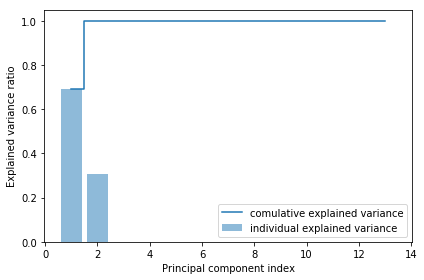

In [56]:
#分散説明率の算出
import matplotlib.pyplot as plt

tot = sum(eigen_vals.real)
var_exp = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,len(eigen_vals)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')

plt.step(range(1,len(eigen_vals)+1), cum_var_exp, where='mid', label='comulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

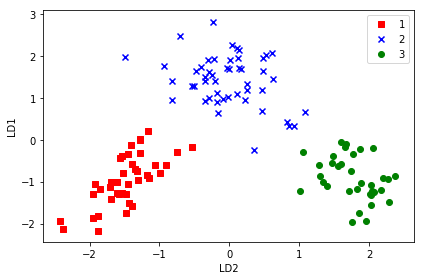

In [61]:
#データの変換

X_train_lda = X_train_std.dot(w)

colors =['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l,0], X_train_lda[y_train==l,1], c=c, label=l, marker=m)
    
plt.ylabel('LD1')
plt.xlabel('LD2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [66]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.6, c=cmap(idx), label=cl, edgecolor='black', marker=markers[idx])
    

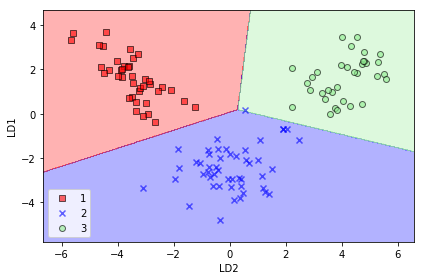

In [67]:
#sklearn implement
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = LogisticRegression()

lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.ylabel('LD1')
plt.xlabel('LD2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

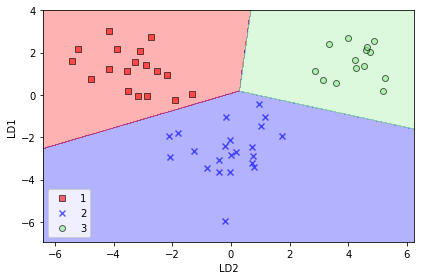

In [68]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.ylabel('LD1')
plt.xlabel('LD2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()